In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Dropout, Input, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
#removing keyword and location column because of null values
df=df.iloc[:,3:]
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [ ]:
df.text[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [ ]:
#tokenizing the text column
tokenized_df = []
tokenizer = nltk.RegexpTokenizer(r"\w+")
for i in range(0,len(df.text)):
    new_words = tokenizer.tokenize(df.text[i])
    tokenized_df.append(new_words)

In [ ]:
tokenized_df[2]

['All',
 'residents',
 'asked',
 'to',
 'shelter',
 'in',
 'place',
 'are',
 'being',
 'notified',
 'by',
 'officers',
 'No',
 'other',
 'evacuation',
 'or',
 'shelter',
 'in',
 'place',
 'orders',
 'are',
 'expected']

In [ ]:
tokenized_df

[['Our',
  'Deeds',
  'are',
  'the',
  'Reason',
  'of',
  'this',
  'earthquake',
  'May',
  'ALLAH',
  'Forgive',
  'us',
  'all'],
 ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada'],
 ['All',
  'residents',
  'asked',
  'to',
  'shelter',
  'in',
  'place',
  'are',
  'being',
  'notified',
  'by',
  'officers',
  'No',
  'other',
  'evacuation',
  'or',
  'shelter',
  'in',
  'place',
  'orders',
  'are',
  'expected'],
 ['13',
  '000',
  'people',
  'receive',
  'wildfires',
  'evacuation',
  'orders',
  'in',
  'California'],
 ['Just',
  'got',
  'sent',
  'this',
  'photo',
  'from',
  'Ruby',
  'Alaska',
  'as',
  'smoke',
  'from',
  'wildfires',
  'pours',
  'into',
  'a',
  'school'],
 ['RockyFire',
  'Update',
  'California',
  'Hwy',
  '20',
  'closed',
  'in',
  'both',
  'directions',
  'due',
  'to',
  'Lake',
  'County',
  'fire',
  'CAfire',
  'wildfires'],
 ['flood',
  'disaster',
  'Heavy',
  'rain',
  'causes',
  'flash',
  'flooding',
  'of',
  'streets

In [ ]:
from nltk import flatten
tokenized_df_flatten=flatten(tokenized_df)

In [ ]:
#num_words function is used to encode on a limit 10000000 words
myTokenizer = Tokenizer(num_words=10000000)
myTokenizer.fit_on_texts(tokenized_df_flatten)

In [ ]:
#word_index assigns a unique index to each word present in the text
print(myTokenizer.word_index)

{'t': 1, 'co': 2, 'http': 3, 'the': 4, 'a': 5, 'in': 6, 'to': 7, 'of': 8, 'i': 9, 'and': 10, 'is': 11, 's': 12, 'you': 13, 'for': 14, 'on': 15, 'it': 16, 'my': 17, 'that': 18, 'with': 19, 'at': 20, 'by': 21, 'this': 22, 'û': 23, 'from': 24, 'https': 25, 'be': 26, 'are': 27, 'was': 28, 'have': 29, 'like': 30, 'amp': 31, 'as': 32, 'up': 33, 'me': 34, 'just': 35, 'but': 36, 'so': 37, 'm': 38, 'not': 39, 'we': 40, 'your': 41, 'out': 42, 'all': 43, 'no': 44, 'after': 45, 'will': 46, 'fire': 47, 'can': 48, 'an': 49, 'has': 50, 'when': 51, 'if': 52, 'he': 53, 'they': 54, 'get': 55, 'new': 56, 'now': 57, 'what': 58, 'via': 59, 'more': 60, '2': 61, 'about': 62, 'or': 63, 'people': 64, 'news': 65, 'one': 66, 'how': 67, 'been': 68, 'don': 69, 'who': 70, 'there': 71, 'over': 72, 'into': 73, 're': 74, 'do': 75, 'video': 76, 'disaster': 77, 'emergency': 78, 'police': 79, 'than': 80, 'would': 81, '3': 82, 'u': 83, 'her': 84, 'body': 85, 'his': 86, 'some': 87, 'still': 88, 'us': 89, 'were': 90, 'calif

In [ ]:
for i in range(0, len(tokenized_df)):
  print(tokenized_df[i])
  print(len(tokenized_df[i]))

Streaming output truncated to the last 5000 lines.
['Over', 'half', 'of', 'poll', 'respondents', 'worry', 'nuclear', 'disaster', 'fading', 'from', 'public', 'consciousness', 'http', 't', 'co', 'YtnnnD631z', 'fukushima']
17
['Chernobyl', 'disaster', 'Wikipedia', 'the', 'free', 'encyclopedia', 'don', 't', 'you', 'just', 'love', 'the', 'nuclear', 'technology', 'it', 's', 'so', 'glorious', 'https', 't', 'co', 'GHucazjSxB']
22
['Err', '509']
2
['Check', 'out', 'this', 'awesome', 'profile', 'on', 'GE', 's', 'swimming', 'robot', 'used', 'in', 'nuclear', 'reactors', 'http', 't', 'co', 'HRc3oxQUIK', 'innovation', 'http', 't', 'co', 'wNPTvbM5T7']
23
['Finnish', 'Nuclear', 'Plant', 'to', 'Move', 'Ahead', 'After', 'Financing', 'Secured', 'gt', 'http', 't', 'co', 'uHkXMXaB9l']
14
['Global', 'Nuclear', 'Reactor', 'Construction', 'Market', 'grew', '4', '5', 'between', '2013', 'and', '2014', 'http', 't', 'co', '74JppeK6o7']
16
['Has', 'An', 'Ancient', 'Nuclear', 'Reactor', 'Been', 'Discovered', 'In', 

In [ ]:
#extracting sequence numbers from the bag of tokens for 7th row
sequences = myTokenizer.texts_to_sequences(tokenized_df[7])

In [ ]:
tokenized_df[7]

['I',
 'm',
 'on',
 'top',
 'of',
 'the',
 'hill',
 'and',
 'I',
 'can',
 'see',
 'a',
 'fire',
 'in',
 'the',
 'woods']

In [ ]:
sequences

[[9],
 [38],
 [15],
 [239],
 [8],
 [4],
 [1935],
 [10],
 [9],
 [48],
 [111],
 [5],
 [47],
 [6],
 [4],
 [4574]]

In [ ]:
#sequencing our tokenized data
df_sequence = []
for i in range(0, len(tokenized_df)):
   sequences=myTokenizer.texts_to_sequences(tokenized_df[i])
   flattened_df = flatten(sequences)
   df_sequence.append(flattened_df)

In [ ]:
df_sequence

[[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620, 4571, 89, 43],
 [195, 47, 238, 773, 6816, 6817, 1217],
 [43,
  1749,
  1621,
  7,
  1934,
  6,
  695,
  27,
  138,
  6818,
  21,
  1750,
  44,
  393,
  264,
  63,
  1934,
  6,
  695,
  1405,
  27,
  1106],
 [804, 2915, 64, 4572, 1500, 264, 1405, 6, 91],
 [35, 104, 1218, 22, 332, 24, 6819, 1751, 32, 278, 24, 1500, 6820, 73, 5, 189],
 [2916,
  394,
  91,
  1501,
  749,
  869,
  6,
  671,
  6821,
  577,
  7,
  1151,
  418,
  47,
  4573,
  1500],
 [223, 77, 870, 296, 1219, 835, 265, 8, 1752, 6, 6822, 1041, 2454, 1502],
 [9, 38, 15, 239, 8, 4, 1935, 10, 9, 48, 111, 5, 47, 6, 4, 4574],
 [71, 12, 49, 78, 264, 1312, 57, 6, 4, 603, 871, 4, 750],
 [9, 38, 2455, 18, 4, 486, 11, 256, 7, 117, 271],
 [578, 64, 644, 24, 4, 279, 464, 37, 645],
 [872,
  556,
  2917,
  11,
  230,
  2918,
  3558,
  696,
  5,
  646,
  9,
  207,
  6,
  556,
  2917,
  58,
  176,
  9,
  333,
  75,
  58,
  176,
  9,
  333,
  75,
  6823,
  265],
 [2919, 265, 1622, 6824, 2917, 906

In [ ]:
tokenized_df[1]

['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada']

In [ ]:
df_sequence[1]

[195, 47, 238, 773, 6816, 6817, 1217]

In [ ]:
len(tokenized_df)

7613

In [ ]:
len(tokenized_df[0])

13

In [ ]:
#padding
max_pad = []
for i in range(0,len(tokenized_df)):
  pad = len(df_sequence[i])
  max_pad.append(pad)

In [ ]:
max_pad[0]

13

In [ ]:
max(max_pad)

34

In [ ]:
#changing sequenced data to dataframe
sequenced_dataframe = pd.DataFrame(columns=['Name'], index=range(len(df_sequence)))

In [ ]:
sequenced_dataframe

,Name
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7608,NaN
7609,NaN
7610,NaN
7611,NaN


In [ ]:
for i in range(0, len(df_sequence)) :
  sequenced_dataframe['Name'][i]=df_sequence[i]


In [ ]:
sequenced_dataframe

,Name
0,"[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620,..."
1,"[195, 47, 238, 773, 6816, 6817, 1217]"
2,"[43, 1749, 1621, 7, 1934, 6, 695, 27, 138, 681..."
3,"[804, 2915, 64, 4572, 1500, 264, 1405, 6, 91]"
4,"[35, 104, 1218, 22, 332, 24, 6819, 1751, 32, 2..."
...,...
7608,"[115, 859, 1376, 1089, 5, 391, 166, 73, 689, 2..."
7609,"[6785, 6786, 6787, 4, 42, 8, 759, 269, 116, 6,..."
7610,"[2810, 2408, 718, 1209, 1608, 1609, 12, 8, 600..."
7611,"[79, 1138, 45, 49, 566, 2314, 352, 19, 5, 129,..."


In [ ]:
print(sequenced_dataframe.Name[0])
print(df_sequence[0])

[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620, 4571, 89, 43]
[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620, 4571, 89, 43]


In [ ]:
df1 = df.assign(Sequences=sequenced_dataframe)
df1

,text,target,Sequences
0,Our Deeds are the Reason of this #earthquake M...,1,"[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620,..."
1,Forest fire near La Ronge Sask. Canada,1,"[195, 47, 238, 773, 6816, 6817, 1217]"
2,All residents asked to 'shelter in place' are ...,1,"[43, 1749, 1621, 7, 1934, 6, 695, 27, 138, 681..."
3,"13,000 people receive #wildfires evacuation or...",1,"[804, 2915, 64, 4572, 1500, 264, 1405, 6, 91]"
4,Just got sent this photo from Ruby #Alaska as ...,1,"[35, 104, 1218, 22, 332, 24, 6819, 1751, 32, 2..."
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[115, 859, 1376, 1089, 5, 391, 166, 73, 689, 2..."
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[6785, 6786, 6787, 4, 42, 8, 759, 269, 116, 6,..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[2810, 2408, 718, 1209, 1608, 1609, 12, 8, 600..."
7611,Police investigating after an e-bike collided ...,1,"[79, 1138, 45, 49, 566, 2314, 352, 19, 5, 129,..."


In [ ]:
#padding the sequences
padded_sequence = []
padded = pad_sequences(df_sequence, padding="post",maxlen=max(max_pad))

In [ ]:
padded[0]

array([ 117, 4570,   27,    4,  868,    8,   22,  263,  140, 1620, 4571,
         89,   43,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
padded_dataframe = pd.DataFrame(columns=['Padded Sequences'],index=range(len(padded)))

In [ ]:
padded_dataframe

,Padded Sequences
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7608,NaN
7609,NaN
7610,NaN
7611,NaN


In [ ]:
for i in range(0, len(padded)):
 padded_dataframe['Padded Sequences'][i] = padded[i]

In [ ]:
padded_dataframe

,Padded Sequences
0,"[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620,..."
1,"[195, 47, 238, 773, 6816, 6817, 1217, 0, 0, 0,..."
2,"[43, 1749, 1621, 7, 1934, 6, 695, 27, 138, 681..."
3,"[804, 2915, 64, 4572, 1500, 264, 1405, 6, 91, ..."
4,"[35, 104, 1218, 22, 332, 24, 6819, 1751, 32, 2..."
...,...
7608,"[115, 859, 1376, 1089, 5, 391, 166, 73, 689, 2..."
7609,"[6785, 6786, 6787, 4, 42, 8, 759, 269, 116, 6,..."
7610,"[2810, 2408, 718, 1209, 1608, 1609, 12, 8, 600..."
7611,"[79, 1138, 45, 49, 566, 2314, 352, 19, 5, 129,..."


In [ ]:
df2= df1.assign(Padded_sequence=padded_dataframe)
df2

,text,target,Sequences,Padded_sequence
0,Our Deeds are the Reason of this #earthquake M...,1,"[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620,...","[117, 4570, 27, 4, 868, 8, 22, 263, 140, 1620,..."
1,Forest fire near La Ronge Sask. Canada,1,"[195, 47, 238, 773, 6816, 6817, 1217]","[195, 47, 238, 773, 6816, 6817, 1217, 0, 0, 0,..."
2,All residents asked to 'shelter in place' are ...,1,"[43, 1749, 1621, 7, 1934, 6, 695, 27, 138, 681...","[43, 1749, 1621, 7, 1934, 6, 695, 27, 138, 681..."
3,"13,000 people receive #wildfires evacuation or...",1,"[804, 2915, 64, 4572, 1500, 264, 1405, 6, 91]","[804, 2915, 64, 4572, 1500, 264, 1405, 6, 91, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[35, 104, 1218, 22, 332, 24, 6819, 1751, 32, 2...","[35, 104, 1218, 22, 332, 24, 6819, 1751, 32, 2..."
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[115, 859, 1376, 1089, 5, 391, 166, 73, 689, 2...","[115, 859, 1376, 1089, 5, 391, 166, 73, 689, 2..."
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[6785, 6786, 6787, 4, 42, 8, 759, 269, 116, 6,...","[6785, 6786, 6787, 4, 42, 8, 759, 269, 116, 6,..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[2810, 2408, 718, 1209, 1608, 1609, 12, 8, 600...","[2810, 2408, 718, 1209, 1608, 1609, 12, 8, 600..."
7611,Police investigating after an e-bike collided ...,1,"[79, 1138, 45, 49, 566, 2314, 352, 19, 5, 129,...","[79, 1138, 45, 49, 566, 2314, 352, 19, 5, 129,..."


In [ ]:
x=padded
y=df2.target.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (4567, 34)
X_test shape: (1523, 34)
X_val shape: (1523, 34)
y_train shape: (4567,)
y_test shape: (1523,)
y val shape: (1523,)


In [ ]:
print(len(myTokenizer.word_index))

21677


In [ ]:
#build the model
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model
vocab_size=len(myTokenizer.word_index)+1
input=Input(shape=(34,))
emn=Embedding(input_dim=vocab_size,output_dim=5)(input)
lstm1=LSTM(units=32,return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)
out=Dense(units=1,activation='sigmoid')(lstm2)
my_model=Model(inputs=input,outputs=out)

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 embedding (Embedding)       (None, 34, 5)             108390    
                                                                 
 lstm (LSTM)                 (None, 34, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 138,151
Trainable params: 138,151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
my_model.fit(X_train ,y_train,epochs=10,validation_data=(X_val,y_val),shuffle=True)

Epoch 1/10
143/143 [==============================] - 28s 116ms/step - loss: 0.6008 - accuracy: 0.6632 - val_loss: 0.4768 - val_accuracy: 0.7800
Epoch 2/10
143/143 [==============================] - 13s 92ms/step - loss: 0.3462 - accuracy: 0.8688 - val_loss: 0.4593 - val_accuracy: 0.8050
Epoch 3/10
143/143 [==============================] - 8s 53ms/step - loss: 0.1885 - accuracy: 0.9380 - val_loss: 0.6124 - val_accuracy: 0.7590
Epoch 4/10
143/143 [==============================] - 5s 38ms/step - loss: 0.1096 - accuracy: 0.9685 - val_loss: 0.7717 - val_accuracy: 0.7649
Epoch 5/10
143/143 [==============================] - 7s 48ms/step - loss: 0.0744 - accuracy: 0.9790 - val_loss: 0.8815 - val_accuracy: 0.7590
Epoch 6/10
143/143 [==============================] - 5s 38ms/step - loss: 0.0562 - accuracy: 0.9820 - val_loss: 0.8975 - val_accuracy: 0.7439
Epoch 7/10
143/143 [==============================] - 7s 47ms/step - loss: 0.0451 - accuracy: 0.9884 - val_loss: 0.8934 - val_accuracy: 0.7

<Axes: >

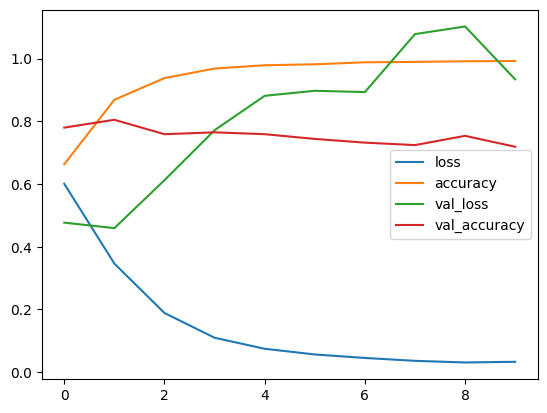

In [ ]:
pd.DataFrame(my_model.history.history).plot()

In [ ]:
y_pred = my_model.predict(X_test)

48/48 [==============================] - 1s 10ms/step


In [ ]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [ ]:
np.unique(y_final)

array([0, 1])

In [ ]:
confusion_matrix(y_test,y_final)

array([[567, 293],
       [139, 524]])

In [ ]:
print(classification_report(y_test,y_final))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       860
           1       0.64      0.79      0.71       663

    accuracy                           0.72      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.73      0.72      0.72      1523



In [ ]:
word = df.text[300]

In [ ]:
df.target[300]

1

In [ ]:
df.iloc[300]

text      Shadow boxing the apocalypse
target                               1
Name: 300, dtype: object

In [ ]:
df.target[200]

0

In [ ]:
word=df.text[4000]

In [ ]:
word

'@casewrites when it rains in NJ it flash floods. Otherwise its just a desert of grief and taxes.'

In [ ]:
tokenizer_1 = nltk.RegexpTokenizer(r"\w+")
new_words_1 = tokenizer_1.tokenize(word)

In [ ]:
new_words_1

['casewrites',
 'when',
 'it',
 'rains',
 'in',
 'NJ',
 'it',
 'flash',
 'floods',
 'Otherwise',
 'its',
 'just',
 'a',
 'desert',
 'of',
 'grief',
 'and',
 'taxes']

In [ ]:
sequences_1=myTokenizer.texts_to_sequences(new_words_1)
sequences_1

[[14848],
 [51],
 [16],
 [1879],
 [6],
 [6180],
 [16],
 [835],
 [229],
 [3470],
 [157],
 [35],
 [5],
 [4245],
 [8],
 [2214],
 [10],
 [14849]]

In [ ]:
flattened_list_1 = flatten(sequences_1)

In [ ]:
padded_1=pad_sequences([flattened_list_1],padding="post",maxlen=max(max_pad))

In [ ]:
y_pred=my_model.predict(padded_1)
if(y_pred>0.5):
  print("Disater")
  print(y_pred)
else:
  print("Non-Disater")
  print(y_pred)

1/1 [==============================] - 0s 26ms/step
Disater
[[0.99478614]]


prediction using test data

In [ ]:
test_csv = pd.read_csv('/content/test.csv')

In [ ]:
test_csv['text']

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [ ]:
test_token = []
tokenizer = nltk.RegexpTokenizer(r"\w+")
for i in range(0,len(test_csv.text)):
    new_words = tokenizer.tokenize(test_csv.text[i])
    test_token.append(new_words)

In [ ]:
test_token[1]

['Heard',
 'about',
 'earthquake',
 'is',
 'different',
 'cities',
 'stay',
 'safe',
 'everyone']

In [ ]:
test_seq = []
for i in range(0,len(test_token)):
    sequences=myTokenizer.texts_to_sequences(test_token[i])
    flattened_list = flatten(sequences)
    test_seq.append(flattened_list)

In [ ]:
test_df=pd.DataFrame(columns=['Name'], index=range(len(test_seq)))

In [ ]:
for i in range(0,len(test_seq)):
    test_df['Name'][i]=test_seq[i]

In [ ]:
new_testdf = test_csv.assign(Sequences=test_df)
new_testdf

,id,keyword,location,text,Sequences
0,0,NaN,NaN,Just happened a terrible car crash,"[35, 917, 5, 1956, 129, 94]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[489, 62, 263, 11, 1197, 2642, 611, 2060, 226]"
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[71, 11, 5, 195, 47, 20, 829, 3540, 27, 5091, ..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[471, 3896, 7500, 1500]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[222, 717, 490, 2559, 6, 350, 10, 1202]"
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[263, 1116, 2927, 2928, 345, 1116]"
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[92, 6, 9050, 1141, 80, 154, 313, 17, 203, 31,..."
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[966, 688, 368, 6, 910, 3, 1, 2]"
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[6255, 606, 449, 253, 1746, 1924, 3, 1, 2, 15344]"


In [ ]:
padded_2 = pad_sequences(test_seq,padding="post",maxlen=max(max_pad))
padded_2[1]

array([ 489,   62,  263,   11, 1197, 2642,  611, 2060,  226,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
x1 = padded_2
len(x1)

3263

In [ ]:
test_csv['text'][35]

'@sakuma_en If you pretend to feel a certain way the feeling can become genuine all by accident. -Hei (Darker than Black) #manga #anime'

In [ ]:
y_pred=my_model.predict(x1[[35]])
if(y_pred>0.5):
  print("Disaster")
  print(y_pred)
else:
  print("Non-Disater")
  print(y_pred)

1/1 [==============================] - 0s 123ms/step
Non-Disater
[[0.00063075]]
